In [242]:
import pandas as pd
import numpy as np

import seaborn as sns 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

from sklearn import datasets

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn import tree

In [302]:
df = pd.read_csv('glass.csv')

In [197]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [198]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [244]:
types = df['Type'].unique()

class_dist = df['Type'].value_counts()
class_dist

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Классы не сбалансорованы, 1й, 2й и совокупность остальных представлены в примерно равном количестве.

<AxesSubplot:title={'center':'Распределение целевой переменной'}, xlabel='Type', ylabel='Count'>

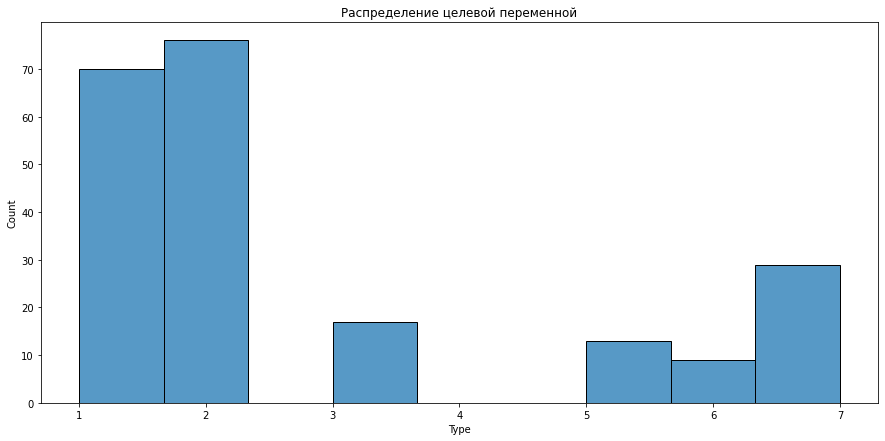

In [200]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
plt.title('Распределение целевой переменной')
sns.histplot(df['Type'])

In [303]:
Y = df['Type']
X = df.copy()

del X['Type']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [304]:
clf = RandomForestClassifier(max_depth=6, random_state=42)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.7441860465116279

<AxesSubplot:>

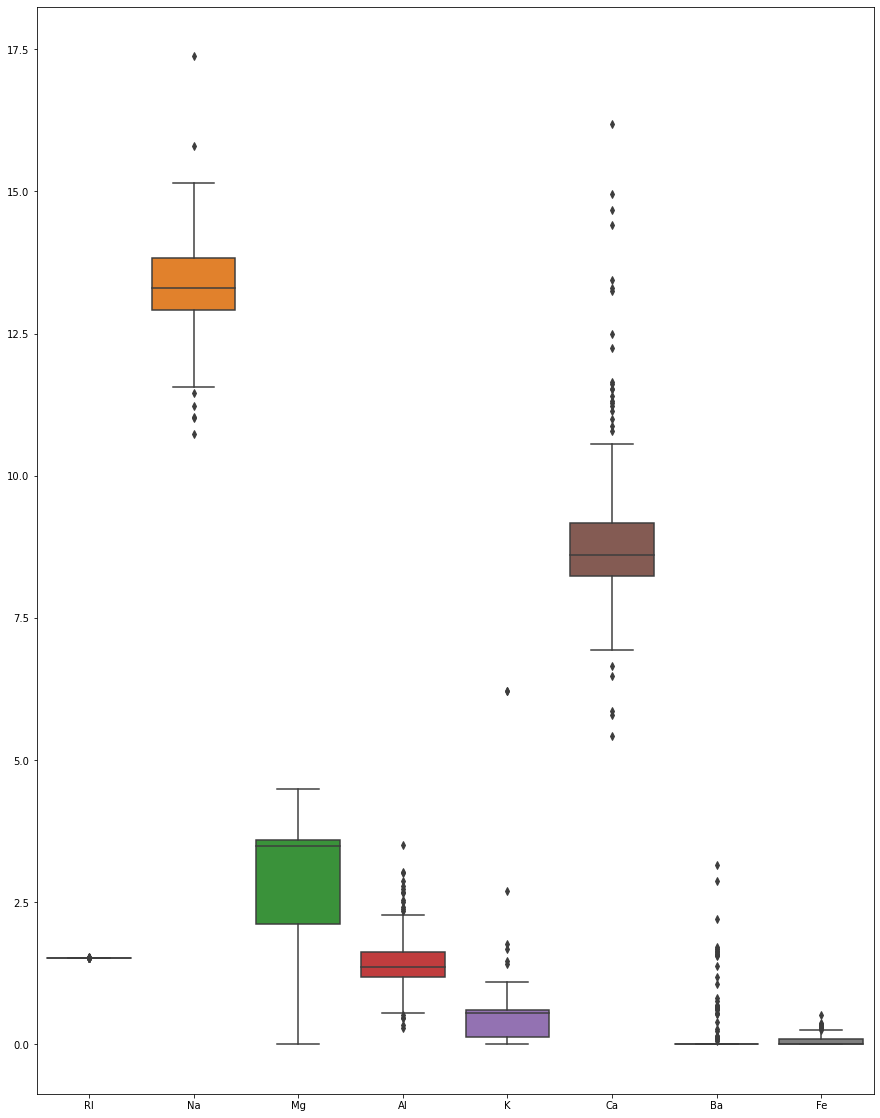

In [145]:
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(15)

del X['Si']

sns.boxplot(data = X)

<AxesSubplot:>

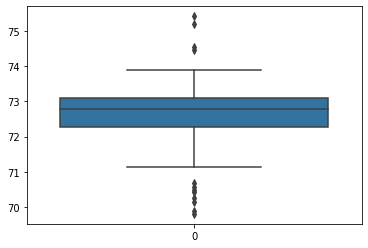

In [149]:
sns.boxplot(data = df['Si'])

За исключением Mg и RI все признаки имеют выбросы 

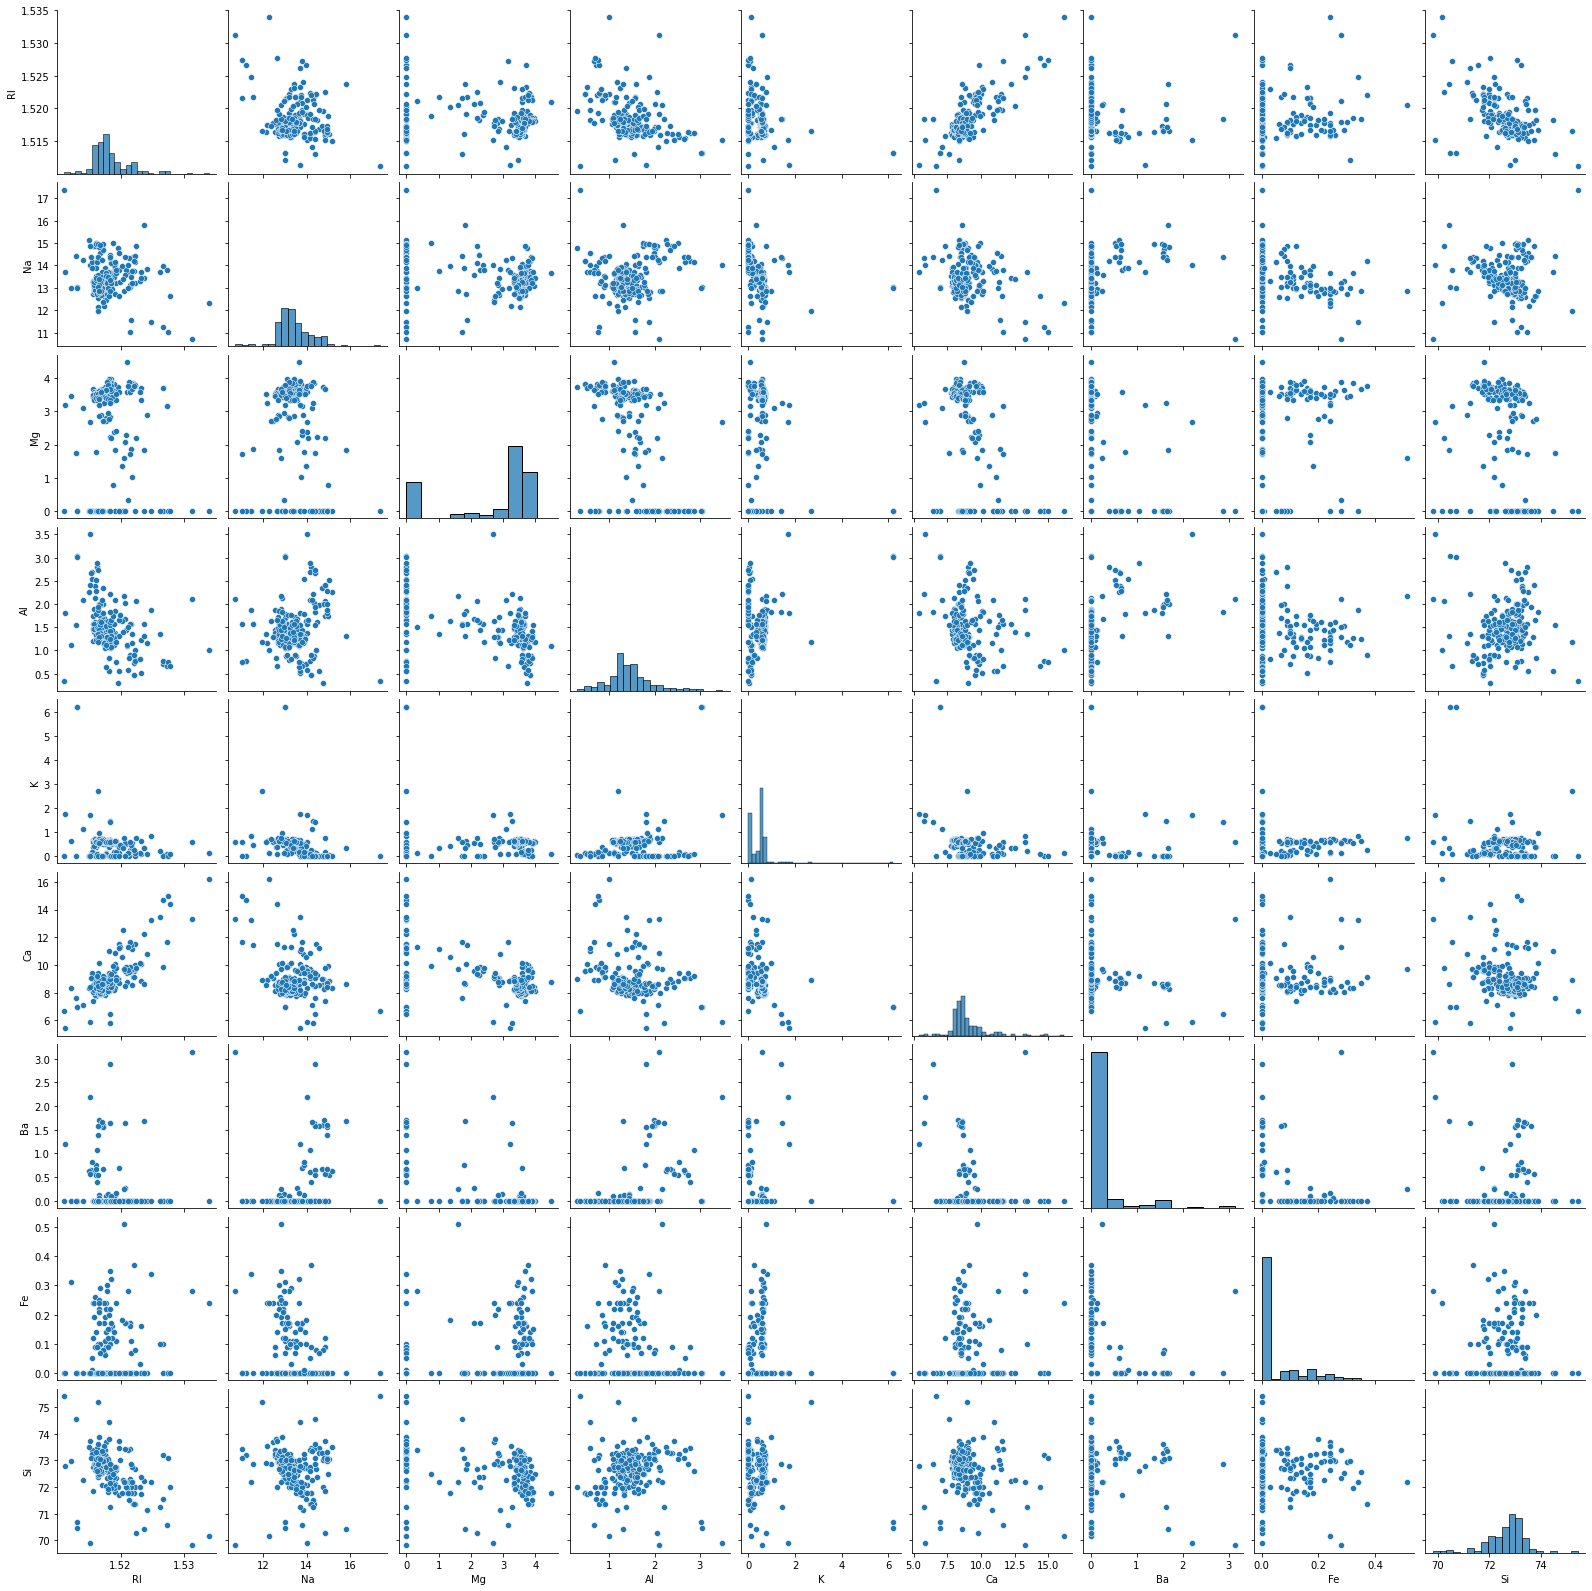

In [150]:
X['Si'] = df['Si']

sns.pairplot(X)

Распределения RI, Na, Al, Ca и Si похожи на нормальные.

Найдем и удалим выбросы с помощью IsolationForest:

In [305]:
clf_IF = IsolationForest(max_samples=100, random_state=42)
clf_IF.fit(X)
y_pred = clf_IF.predict(X)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,
        1,  1,  1, -1, -1, -1,  1, -1,  1,  1])

In [306]:
df['Outlier'] = y_pred
df_without_outliers = df[df['Outlier'] == 1]
df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 213
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RI       177 non-null    float64
 1   Na       177 non-null    float64
 2   Mg       177 non-null    float64
 3   Al       177 non-null    float64
 4   Si       177 non-null    float64
 5   K        177 non-null    float64
 6   Ca       177 non-null    float64
 7   Ba       177 non-null    float64
 8   Fe       177 non-null    float64
 9   Type     177 non-null    int64  
 10  Outlier  177 non-null    int32  
dtypes: float64(9), int32(1), int64(1)
memory usage: 15.9 KB


In [307]:
Y = df_without_outliers['Type']
X = df_without_outliers
del X['Type']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [308]:
clf = RandomForestClassifier(max_depth=6, random_state=42)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.7777777777777778

После удаления выбросов осталось 177 объектов из 214. Точность модели улучшилась на 3%.

In [251]:
class_dist_1 = Y.value_counts()
class_dist_1

1    69
2    67
3    16
7    11
5     8
6     6
Name: Type, dtype: int64

In [252]:
for type_ in types:
    print('процент удаленных записей для ', type_,' типа составляет:', 
          round((class_dist[type_]-class_dist_1[type_])/class_dist[type_]*100),'%')
    

процент удаленных записей для  1  типа составляет: 1 %
процент удаленных записей для  2  типа составляет: 12 %
процент удаленных записей для  3  типа составляет: 6 %
процент удаленных записей для  5  типа составляет: 38 %
процент удаленных записей для  6  типа составляет: 33 %
процент удаленных записей для  7  типа составляет: 62 %


Вывод: существенная часть данных по классам 5, 6 и 7 была удалена, что не очень хорошо, т.к. они и так слабо представлены. 

Найдем и удалим выбросы с помощью DBSCAN:

In [288]:
df = pd.read_csv('glass.csv')
Y = df['Type']
X = df.copy()
del X['Type']

In [289]:
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.8, min_samples=2).fit(X)
db.labels_

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  2,  0,  0, -1,  1,  0, -1,
        0,  0,  0,  0,  3, -1,  0,  0,  0,  0, -1,  1,  1,  1, -1,  4,  4,
        4,  1, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  3,  0,  0,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  5,  5, -1,  0,  0,  0,  0,  0,  6,
        0,  0,  0,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  6,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0, -1,  1, -1,
        0,  0,  0,  0,  1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  7,  7, -1, -1, -1,  8, -1,  8,  8, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  9, 10, 10,  9,  9, 11,  9, 11, 11, -1, 11, 12,
       11, 12, 12, -1,  9, -1, 12, -1, 13, 13], dtype=int64)

In [290]:
df['Outlier'] = db.labels_
df_without_outliers = df[df['Outlier'] != -1]
df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 213
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RI       151 non-null    float64
 1   Na       151 non-null    float64
 2   Mg       151 non-null    float64
 3   Al       151 non-null    float64
 4   Si       151 non-null    float64
 5   K        151 non-null    float64
 6   Ca       151 non-null    float64
 7   Ba       151 non-null    float64
 8   Fe       151 non-null    float64
 9   Type     151 non-null    int64  
 10  Outlier  151 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 14.2 KB


In [291]:
Y = df_without_outliers['Type']
X = df_without_outliers
del X['Type']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [292]:
clf = RandomForestClassifier(max_depth=6, random_state=42)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.7741935483870968

In [293]:
class_dist_2 = Y.value_counts()
class_dist_2

1    63
2    53
7    18
3    12
6     3
5     2
Name: Type, dtype: int64

In [294]:
for type_ in types:
    print('процент удаленных записей для ', type_,' типа составляет:', 
          round((class_dist[type_]-class_dist_2[type_])/class_dist[type_]*100),'%')
    

процент удаленных записей для  1  типа составляет: 10 %
процент удаленных записей для  2  типа составляет: 30 %
процент удаленных записей для  3  типа составляет: 29 %
процент удаленных записей для  5  типа составляет: 85 %
процент удаленных записей для  6  типа составляет: 67 %
процент удаленных записей для  7  типа составляет: 38 %


DBSCAN на наших данных себя показывает странно, с параметрами, выкрученными на "считай классами практически всё", находит очень много выбросов, точность модели после удаления выбросов выросла на 3%.

Вывод: поиск выбросов был реализован с помощью алгоритмов IsolationForest и DBSCAN. Для алгоритма DBSCAN данные предварительно 
нормировались, найденные выбросы удалялись, на очищенных данных обучался алгоритм классификации RandomForestClassifier. Точность 
после очищения данных возрасла незначительно, на 3%.
Данные на наличие выбросов исследовать нужно, чтобы лучше понимать, как именно они распределены, стоит их удалять или нет.